In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default

In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [4]:
worksheet = gc.open('MyMLData').sheet1
data = worksheet.get_all_values()

In [5]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})

In [6]:
dataset1.head()

,Input,Output
0,1.0,15.0
1,2.0,24.0
2,3.0,32.0
3,4.0,43.0
4,5.0,55.0


In [7]:
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [8]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [12.],
       [14.],
       [15.],
       [17.]])

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [10]:
Scaler = MinMaxScaler()

In [11]:
Scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train1 = Scaler.transform(X_train)

In [18]:
ai_brain = Sequential([
    Dense(6,activation = 'relu'),
    Dense(6,activation = 'relu'),
    Dense(1)
])

In [19]:
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')

In [20]:
ai_brain.fit(X_train1,y_train,epochs = 4000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 8ms/step - loss: 2459.1350
Epoch 1502/4000
1/1 [==============================] - 0s 10ms/step - loss: 2453.4961
Epoch 1503/4000
1/1 [==============================] - 0s 12ms/step - loss: 2447.8584
Epoch 1504/4000
1/1 [==============================] - 0s 14ms/step - loss: 2442.2219
Epoch 1505/4000
1/1 [==============================] - 0s 12ms/step - loss: 2436.5869
Epoch 1506/4000
1/1 [==============================] - 0s 12ms/step - loss: 2430.9524
Epoch 1507/4000
1/1 [==============================] - 0s 10ms/step - loss: 2425.3198
Epoch 1508/4000
1/1 [==============================] - 0s 13ms/step - loss: 2419.6875
Epoch 1509/4000
1/1 [==============================] - 0s 14ms/step - loss: 2414.0569
Epoch 1510/4000
1/1 [==============================] - 0s 13ms/step - loss: 2408.4275
Epoch 1511/4000
1/1 [==============================] - 0s 11ms/step - loss: 2402.7993
Epoch 1512/4000
1/1 

In [21]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

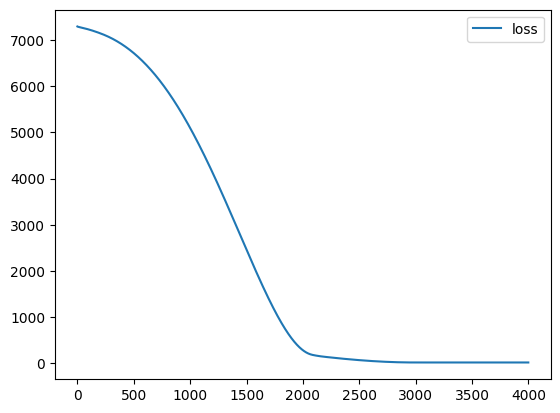

In [22]:
loss_df.plot()

In [23]:
X_test1 = Scaler.transform(X_test)

In [24]:
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 293ms/step - loss: 8.8639


8.863943099975586

In [25]:
X_n1 = [[30]]

In [26]:
X_n1_1 = Scaler.transform(X_n1)

In [27]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 92ms/step


array([[287.24963]], dtype=float32)